In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotions/text.csv


In [3]:
import tensorflow as tf

# Enable GPU acceleration
tf.config.set_visible_devices([], 'GPU')

2024-04-30 22:24:40.992908: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 22:24:40.993030: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 22:24:41.130000: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
df=pd.read_csv("/kaggle/input/emotions/text.csv")
df.head(11)
#df

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
5,5,i was beginning to feel quite disheartened,0
6,6,i would think that whomever would be lucky eno...,2
7,7,i fear that they won t ever feel that deliciou...,1
8,8,im forever taking some time out to have a lie ...,5
9,9,i can still lose the weight without feeling de...,0


In [6]:
# Remove the 'Unnamed: 0' column from the DataFrame
df = df.drop('Unnamed: 0', axis=1)

# Display the DataFrame to verify the column has been removed
print(df.head())


                                                text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


In [7]:
# Print the total number of texts in the dataset excluding the header
total_texts = len(df) - 1
print("Total number of texts (excluding header):", total_texts)


Total number of texts (excluding header): 416808


In [8]:
import re
import string
# Removing special characters
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
df['text'] = df['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from text
def remove_stopwords(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords using set operations
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    # Join tokens back into a string
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Apply the remove_stopwords function to each text in the DataFrame
df['text_without_stopwords'] = df['text'].apply(remove_stopwords)

# Display the DataFrame with text removed stopwords
print(df.head())


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
                                                text  label  \
0      i just feel really helpless and heavy hearted      4   
1  ive enjoyed being able to slouch about relax a...      0   
2  i gave up my internship with the dmrg and am f...      4   
3                         i dont know i feel so lost      0   
4  i am a kindergarten teacher and i am thoroughl...      4   

                              text_without_stopwords  
0                 feel really helpless heavy hearted  
1  ive enjoyed able slouch relax unwind frankly n...  
2            gave internship dmrg feeling distraught  
3                                dont know feel lost  
4  kindergarten teacher thoroughly weary job take...  


In [14]:
# Check for duplicates in the text column of the DataFrame
duplicates = df.duplicated(subset=['text'], keep=False)

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Check if any duplicates exist
if num_duplicates > 0:
    print("Duplicates found in the text column.")
    print("Number of duplicates:", num_duplicates)
    # Display duplicate rows
    duplicate_rows = df[duplicates]
    print(duplicate_rows)
else:
    print("No duplicates found in the text column.")


Duplicates found in the text column.
Number of duplicates: 45804
                                                     text  label  \
0           i just feel really helpless and heavy hearted      4   
8       im forever taking some time out to have a lie ...      5   
28                                                   when      3   
34      i was less intelligent and could not really fe...      2   
56      i went from feeling like i knew what i was doi...      0   
...                                                   ...    ...   
416767  ive worked particularly hard with this year on...      4   
416785  i have encountered lately including feeling li...      3   
416798  i continue to feel passionate about these proj...      2   
416802  i feel like i have been neglecting you my fait...      1   
416805  i began to realize that when i was feeling agi...      3   

                                   text_without_stopwords  
0                      feel really helpless heavy hearted 

In [16]:
# Remove duplicates from the DataFrame
df.drop_duplicates(subset=['text'], keep='first', inplace=True)

In [17]:
# Print the total number of texts in the dataset excluding the header
total_texts = len(df) - 1
print("Total number of texts (excluding header):", total_texts)

Total number of texts (excluding header): 393821


In [18]:
# Count the occurrences of each unique label
label_counts = df['label'].value_counts()

# Display the label counts
print("Label Counts:")
print(label_counts)


Label Counts:
label
1    135030
0    118511
3     54777
4     43629
2     29468
5     12407
Name: count, dtype: int64


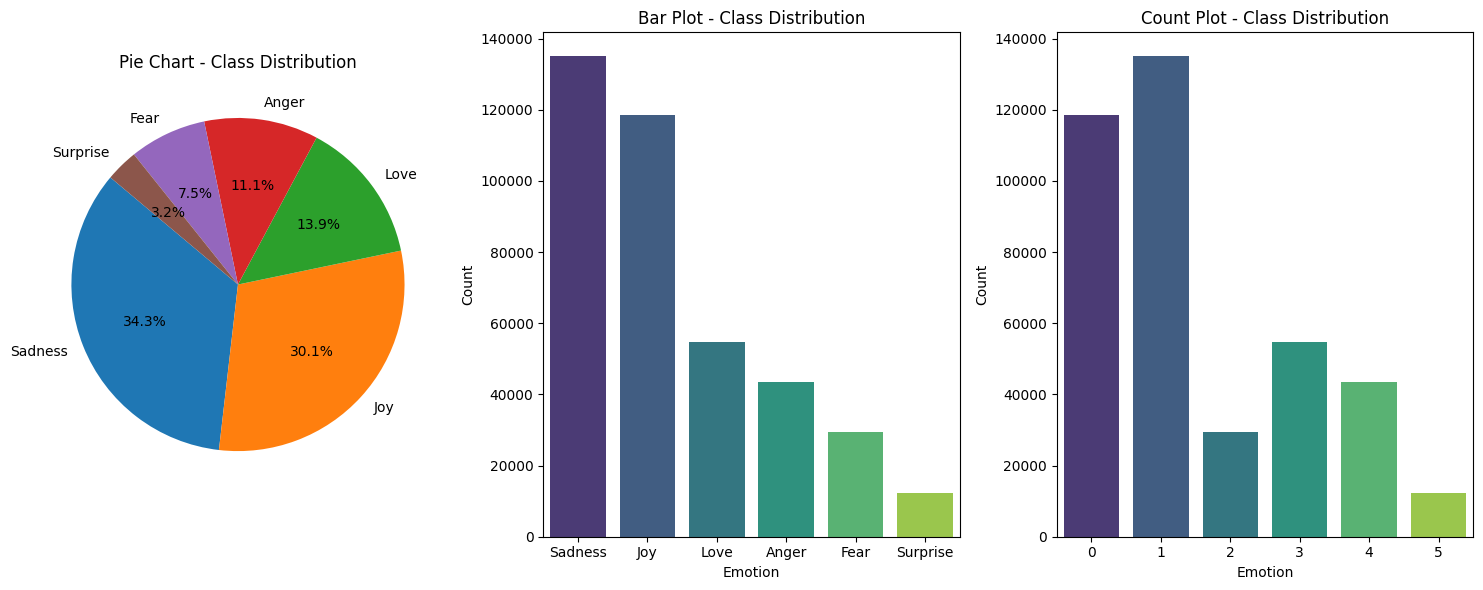

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the labels and corresponding counts
labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
counts = df['label'].value_counts()

# Plot a pie chart
plt.figure(figsize=(15, 6))

# Pie chart
plt.subplot(1, 3, 1)
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart - Class Distribution')

# Bar plot
plt.subplot(1, 3, 2)
sns.barplot(x=labels, y=counts, palette='viridis')
plt.title('Bar Plot - Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')

# Count plot
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='label', palette='viridis')
plt.title('Count Plot - Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [21]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Define the resampling strategy (undersampling or oversampling)
# Uncomment one of the following lines based on your choice

# Undersampling
# sampler = RandomUnderSampler(sampling_strategy='auto')

# Oversampling
sampler = RandomOverSampler(sampling_strategy='auto')

# Apply the resampling strategy to create a balanced dataset
X_resampled, y_resampled = sampler.fit_resample(df[['text']], df['label'])

# Create a new DataFrame with the balanced dataset
balanced_df = pd.DataFrame({'text': X_resampled['text'], 'label': y_resampled})

# Print the class distribution in the balanced dataset
print(balanced_df['label'].value_counts())


label
4    135030
0    135030
2    135030
1    135030
5    135030
3    135030
Name: count, dtype: int64


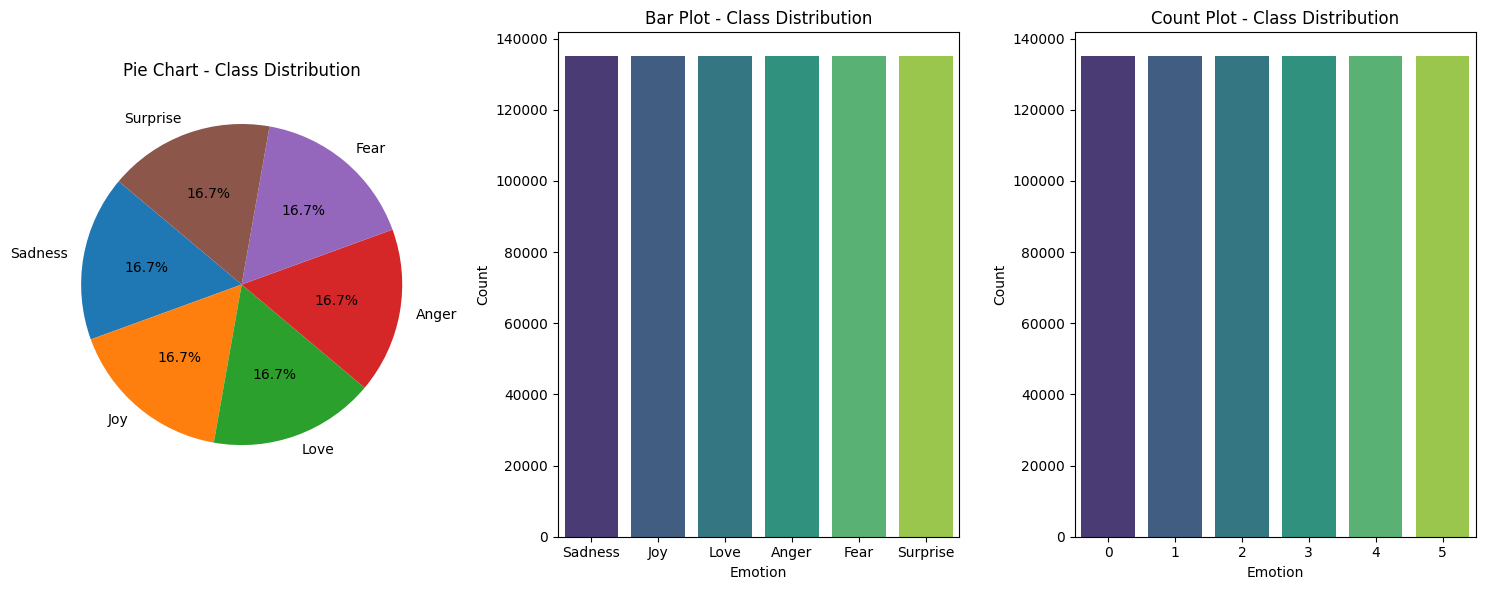

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the labels and corresponding counts
labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
counts = balanced_df['label'].value_counts()

# Plot a pie chart
plt.figure(figsize=(15, 6))

# Pie chart
plt.subplot(1, 3, 1)
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart - Class Distribution')

# Bar plot
plt.subplot(1, 3, 2)
sns.barplot(x=labels, y=counts, palette='viridis')
plt.title('Bar Plot - Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')

# Count plot
plt.subplot(1, 3, 3)
sns.countplot(data=balanced_df, x='label', palette='viridis')
plt.title('Count Plot - Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [23]:
balanced_df.head(10)

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
5,i was beginning to feel quite disheartened,0
6,i would think that whomever would be lucky eno...,2
7,i fear that they won t ever feel that deliciou...,1
8,im forever taking some time out to have a lie ...,5
9,i can still lose the weight without feeling de...,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, r2_score
import matplotlib.pyplot as plt

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(balanced_df['text'], balanced_df['label'], test_size=0.3, random_state=42)

# Define a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Vectorize the training and test text data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_vec)
y_pred_proba_lr = lr_model.predict_proba(X_test_vec)  # Probability scores for all classes

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr, multi_class='ovr')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
r2_lr = r2_score(y_test, y_pred_lr)

# Print evaluation metrics
print("Logistic Regression Classifier:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"AUC: {roc_auc_lr:.2f}")
print(f"F1 Score: {f1_lr:.2f}")
print(f"R2 Score: {r2_lr:.2f}")

Logistic Regression Classifier:
Accuracy: 0.95
AUC: 1.00
F1 Score: 0.95
R2 Score: 0.91


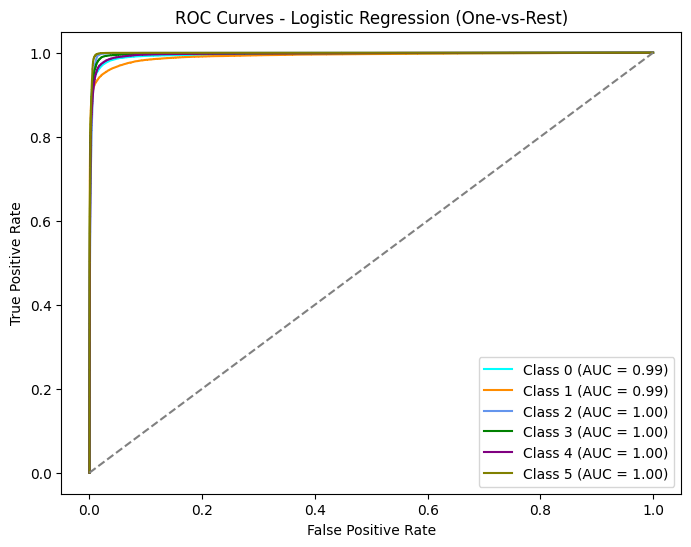

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define a list of colors for plotting
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'purple', 'olive', 'navy', 'teal', 'maroon', 'goldenrod']

# Compute ROC curves and AUC scores for each class
n_classes = len(np.unique(y_test))
fpr_dict = {}
tpr_dict = {}
auc_dict = {}

for i in range(n_classes):
    fpr_dict[i], tpr_dict[i], _ = roc_curve(y_test == i, y_pred_proba_lr[:, i])
    auc_dict[i] = auc(fpr_dict[i], tpr_dict[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr_dict[i], tpr_dict[i], label=f'Class {i} (AUC = {auc_dict[i]:.2f})', color=colors[i % len(colors)])

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Logistic Regression (One-vs-Rest)')
plt.legend()
plt.show()

In [27]:
from sklearn.naive_bayes import MultinomialNB

# Train Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test_vec)
y_pred_proba_nb = nb_model.predict_proba(X_test_vec)  # Probability scores for all classes

# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb, multi_class='ovr')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
r2_nb = r2_score(y_test, y_pred_nb)

# Print evaluation metrics
print("Multinomial Naive Bayes Classifier:")
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"AUC: {roc_auc_nb:.2f}")
print(f"F1 Score: {f1_nb:.2f}")
print(f"R2 Score: {r2_nb:.2f}")


Multinomial Naive Bayes Classifier:
Accuracy: 0.91
AUC: 0.99
F1 Score: 0.91
R2 Score: 0.81


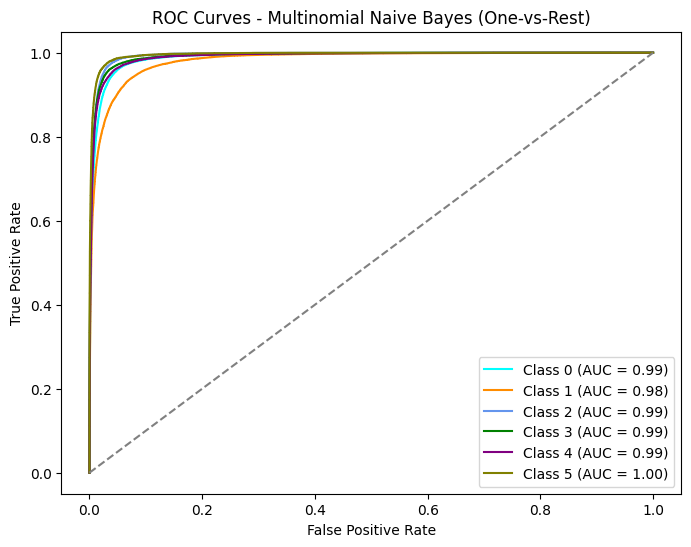

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define a list of colors for plotting
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'purple', 'olive', 'navy', 'teal', 'maroon', 'goldenrod']

# Compute ROC curves and AUC scores for each class
n_classes = len(np.unique(y_test))
fpr_dict = {}
tpr_dict = {}
auc_dict = {}

for i in range(n_classes):
    fpr_dict[i], tpr_dict[i], _ = roc_curve(y_test == i, y_pred_proba_nb[:, i])
    auc_dict[i] = auc(fpr_dict[i], tpr_dict[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr_dict[i], tpr_dict[i], label=f'Class {i} (AUC = {auc_dict[i]:.2f})', color=colors[i % len(colors)])

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Multinomial Naive Bayes (One-vs-Rest)')
plt.legend()
plt.show()


In [29]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_vec, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_vec)
y_pred_proba_dt = dt_model.predict_proba(X_test_vec)  # Probability scores for all classes

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
# Decision trees do not output probabilities directly, so we cannot calculate ROC AUC for each class
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
r2_dt = r2_score(y_test, y_pred_dt)

# Print evaluation metrics
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_dt:.2f}")
# ROC AUC cannot be calculated for Decision Trees
print("ROC AUC: N/A")
print(f"F1 Score: {f1_dt:.2f}")
print(f"R2 Score: {r2_dt:.2f}")


Decision Tree Classifier:
Accuracy: 0.97
ROC AUC: N/A
F1 Score: 0.97
R2 Score: 0.93


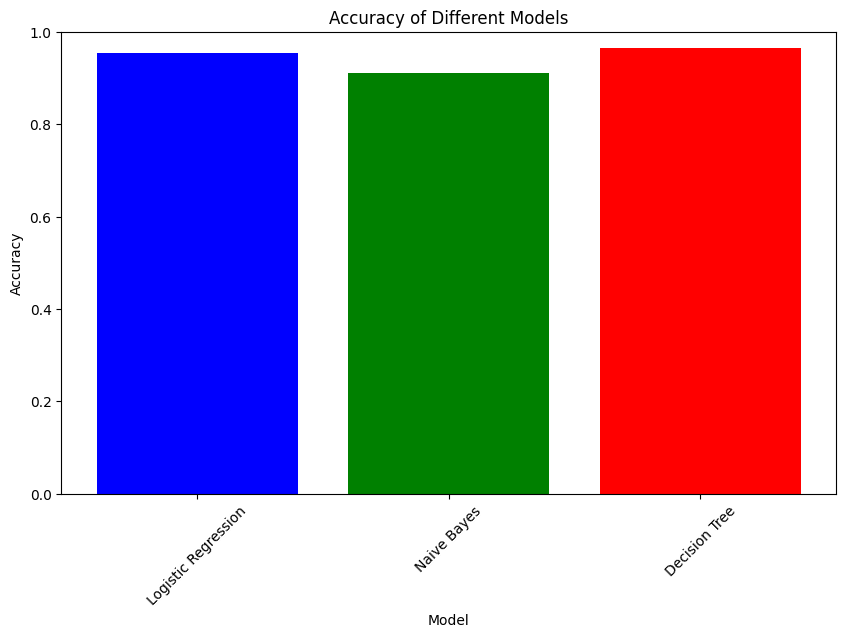

In [31]:
import matplotlib.pyplot as plt

# Define the model names and their accuracies
model_names = ['Logistic Regression', 'Naive Bayes', 'Decision Tree']
accuracies = [accuracy_lr, accuracy_nb, accuracy_dt]

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limits
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

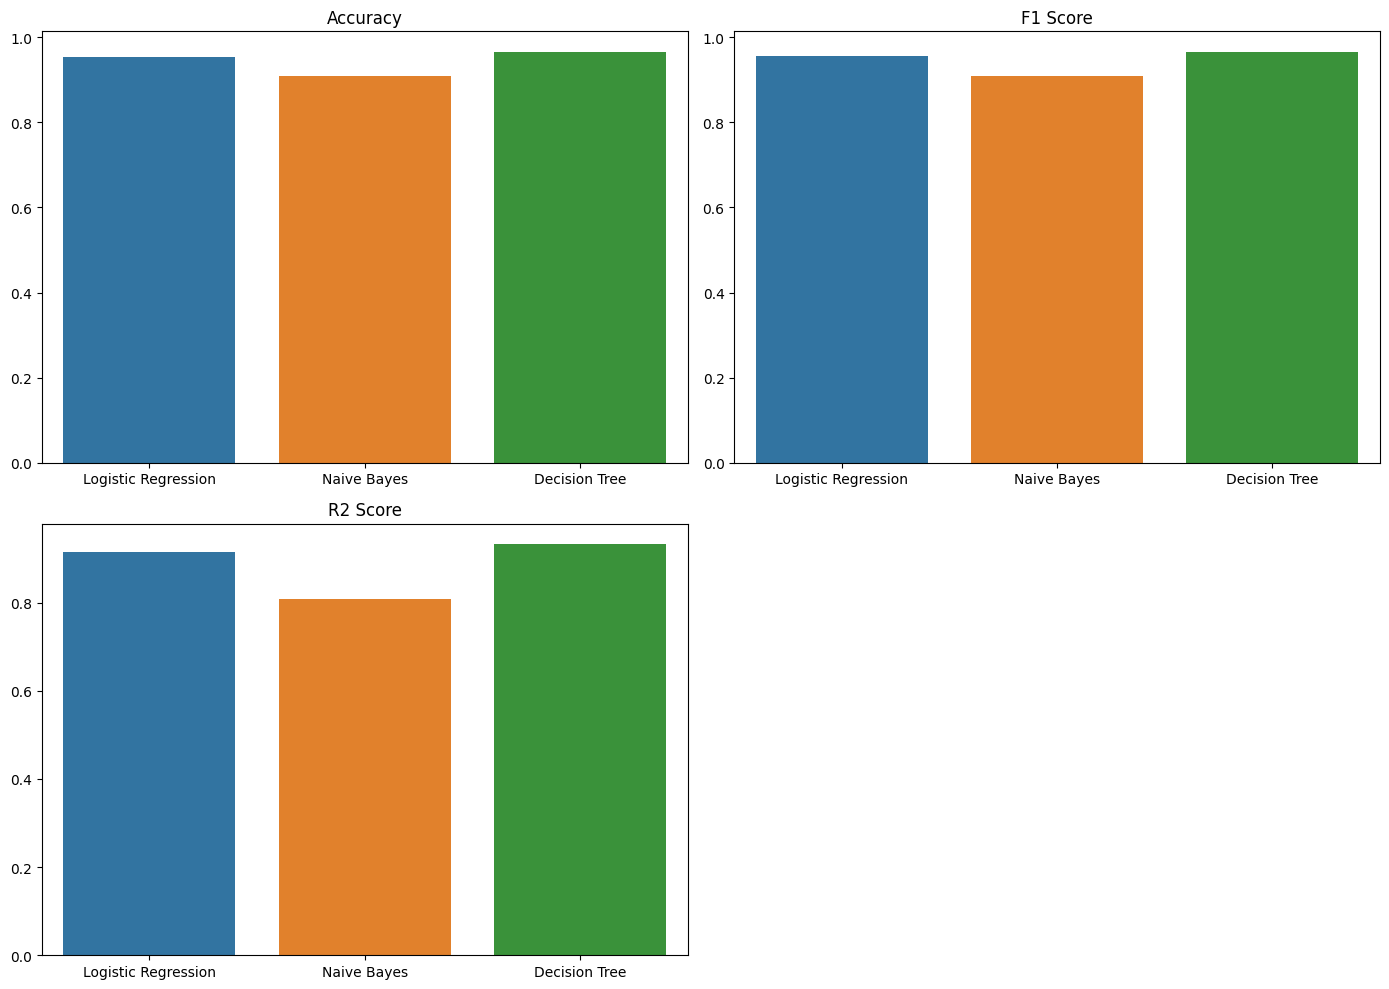

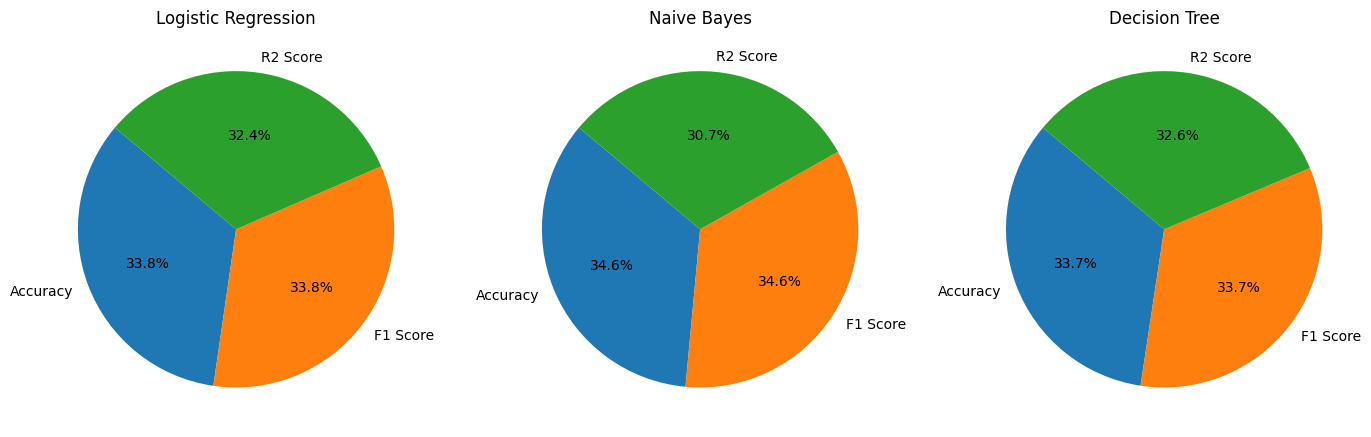

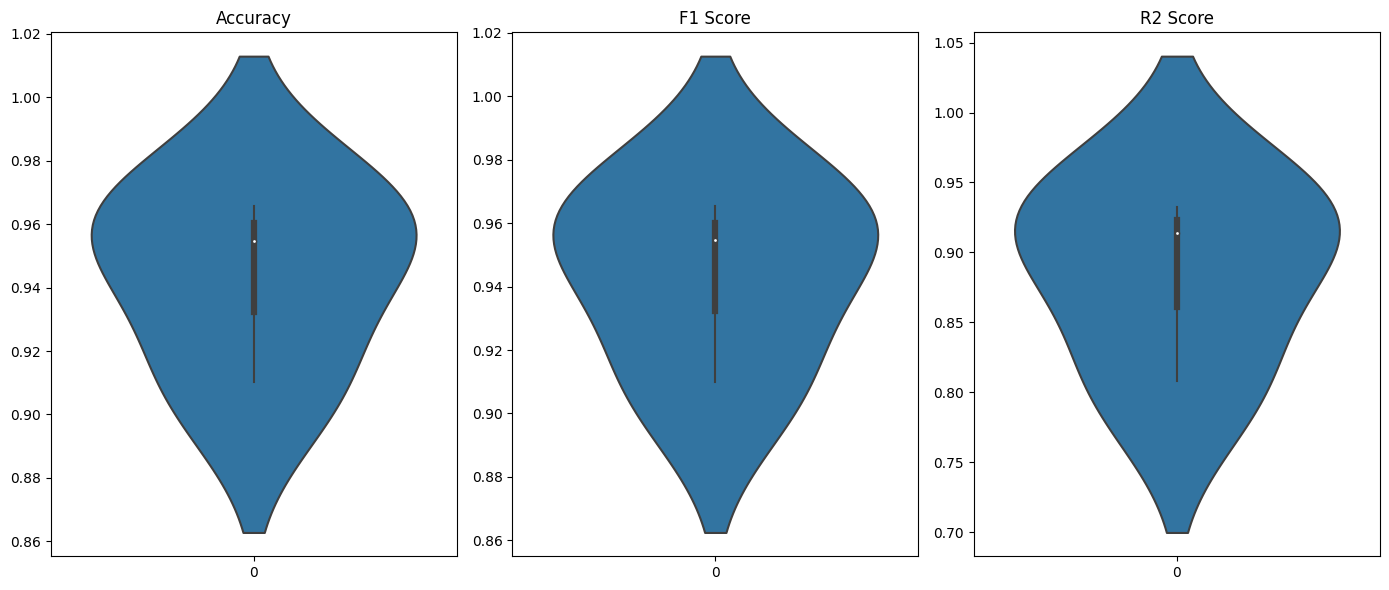

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models and evaluation metrics
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree']
metrics = ['Accuracy', 'F1 Score', 'R2 Score']

# Define the evaluation metric values for each model
values = {
    'Logistic Regression': [accuracy_lr, f1_lr, r2_lr],
    'Naive Bayes': [accuracy_nb, f1_nb, r2_nb],
    'Decision Tree': [accuracy_dt, f1_dt, r2_dt]
}

# Create a bar plot for each metric
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=models, y=[value[i-1] for value in values.values()])
    plt.title(metric)
    plt.ylabel('')
plt.tight_layout()
plt.show()

# Create a pie chart for each model
plt.figure(figsize=(14, 6))
for i, model in enumerate(models, 1):
    plt.subplot(1, 3, i)
    plt.pie(values[model], labels=metrics, autopct='%1.1f%%', startangle=140)
    plt.title(model)
plt.tight_layout()
plt.show()

# Create a violin plot for each metric
plt.figure(figsize=(14, 6))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(data=[value[i-1] for value in values.values()], orient='v')
    plt.title(metric)
    plt.ylabel('')
plt.tight_layout()
plt.show()


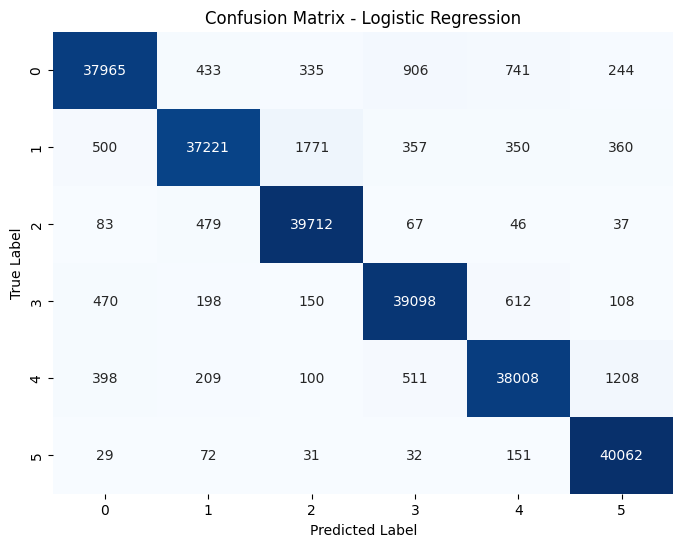

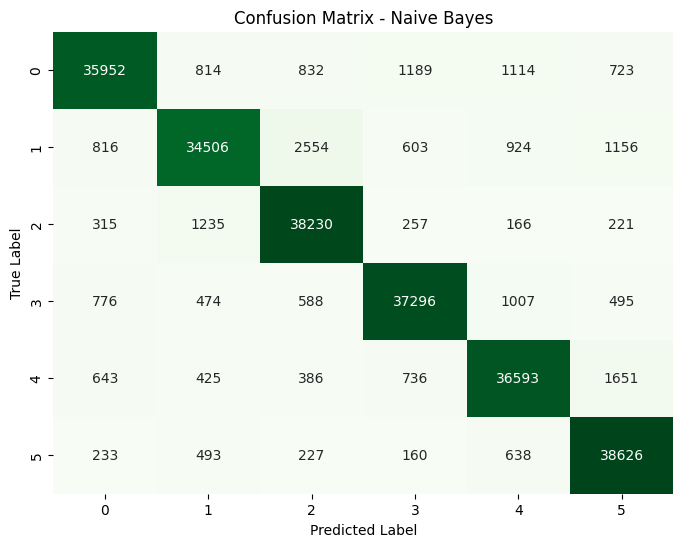

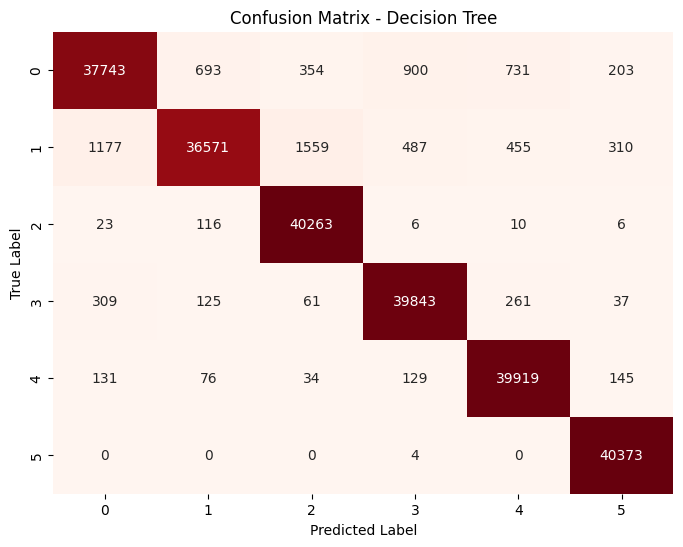

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
